## Import Data

In [120]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

import glob
import os

import random

import common_functions as cf

In [121]:
path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\00_DataSets'
filenames = glob.glob(path + "/**/*.csv")

# shuffeling the files as its always ordered alphabetic
random.seed(10)
shuffled_filenames = random.sample(filenames, len(filenames))

In [122]:
dfs = []
num_t = cf.START_T_COUNT
num_f = cf.START_F_COUNT
for filename in shuffled_filenames:
    df = pd.read_csv(filename, index_col=False)
    
    # # append extra rows for the small datatsets
    # if df.shape[0] < SMALLEST_DS_SIZE:
    #     missing_rows = SMALLEST_DS_SIZE - df.shape[0]
    #     for i in range(missing_rows):
    #         df = df.append(df.iloc[0]) 
    

    # Rename columns
    df.columns= ["time","rotR_x","rotR_y","rotR_z","acc_x","acc_y","acc_z","or_x","or_y","or_z","grav_x","grav_y","grav_z"]
    
    # # fix units
    df.acc_x = df.acc_x/4096.0
    df.acc_y = df.acc_y/4096.0
    df.acc_z = df.acc_z/4096.0
    
    df.rotR_x = df.rotR_x/16.4
    df.rotR_y = df.rotR_y/16.4
    df.rotR_z = df.rotR_z/16.4
    
    df.grav_x = df.grav_x/4096.0
    df.grav_y = df.grav_y/4096.0
    df.grav_z = df.grav_z/4096.0
    
    # get the file name and set it in action column
    _, tail = os.path.split(filename)
    df["action"] = str(tail).split(".")[0]
    
    # add the label (0= Not drinking, 1= drinking)
    # add action_num value to ideintify separate observations
    if df.action.str.startswith("t_").sum():
        df["label"] = 1
        df["action_num"] = num_t # 0 - 499
        num_t += 1
    else:
        df["label"] = 0
        df["action_num"] = num_f # 500 - 1000
        num_f += 1
    
    # include time in index
    df = df.drop(columns="time").reset_index().rename(columns={"index":"time"})
                                                                                                                                                                                                                                                                                                                                                                                                                
    dfs.append(df)


In [123]:
# Assume we want to have time series data with shape (num_samples, seq_length, num_features)
# where num_samples is the number of sequences, seq_length is the length of each sequence,
# and num_features is the number of variables included in the time series data



# Initialize an empty list to store the windowed data
windowed_dfs=[]
# Loop over each df in the dfs
for df in dfs:
    # Extract the number of time steps(rows) in the df
    num_steps = df.shape[0]
    if num_steps >= cf.SMALLEST_DS_SIZE:
        # Calculate the number of windows that can be created from the df
        num_windows = int((num_steps - cf.SEQUENCE_SIZE) / cf.step_size) + 1

        # Loop over each window in the sample

        for i in range(num_windows):
            # Calculate the start and end indices of the window
            start = i * cf.step_size
            end = start + cf.SEQUENCE_SIZE
            # Extract the window from the sample
            window_df = df.iloc[start:end, :]
            # Append the window to the list of windowed data
            windowed_dfs.append(window_df)
        
# Convert the list of windowed data to a NumPy array
w_arr_all = np.array(windowed_dfs)

In [124]:
w_arr_all.shape

(2570, 50, 16)

In [125]:
w_df_all = pd.concat(windowed_dfs,axis=0).set_index("time")

In [126]:
w_df_all.shape

(128500, 15)

In [127]:
len(filenames)

185

In [128]:
num_t

87

In [129]:
num_f

598

In [130]:
w_df_all.shape

(128500, 15)

In [131]:
w_df_all

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
time,,,,,,,,,,,,,,,
0,-12.012195,5.243902,1.158537,0.098145,0.047607,0.029785,15,13,80,0.271240,-0.230225,0.934326,t_stand_left_DrinkBottle_10ml_1s_right,1,0
1,-23.780488,17.195122,3.658537,0.093994,0.043213,0.041748,15,14,80,0.259766,-0.249023,0.932861,t_stand_left_DrinkBottle_10ml_1s_right,1,0
2,-27.926829,21.402439,2.804878,0.099121,0.081543,0.036377,14,15,80,0.246094,-0.265869,0.931885,t_stand_left_DrinkBottle_10ml_1s_right,1,0
3,-64.329268,20.426829,9.085366,0.108398,0.070312,0.013916,12,19,80,0.219238,-0.322998,0.920410,t_stand_left_DrinkBottle_10ml_1s_right,1,0
4,-107.073171,19.634146,14.451220,0.096680,0.083252,-0.019775,11,24,81,0.195801,-0.404785,0.892822,t_stand_left_DrinkBottle_10ml_1s_right,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-2.073171,-7.256098,-47.682927,0.104248,-0.101318,0.054688,63,64,339,0.906738,-0.387207,0.165283,t_stand_hold_DrinkCup_10ml_1s_right,1,86
221,-9.634146,2.439024,-37.621951,0.055176,-0.089844,0.062256,64,63,341,0.914307,-0.369629,0.164551,t_stand_hold_DrinkCup_10ml_1s_right,1,86
222,-11.951220,-2.439024,-28.292683,0.032471,-0.084961,0.055420,65,62,342,0.919189,-0.358154,0.162598,t_stand_hold_DrinkCup_10ml_1s_right,1,86


In [132]:
w_df_all.describe()

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000
mean,-0.188512,0.148507,-0.090838,0.018208,0.001246,0.001691,-11.693751,52.519572,156.407004,-0.192600,-0.544404,0.322081,0.489883,300.763035
std,50.515063,30.840650,35.231496,0.078183,0.100835,0.075560,26.470025,53.389376,104.772476,0.413571,0.421863,0.461841,0.499900,255.605905
min,-1022.195122,-326.341463,-289.573171,-0.916748,-2.086914,-1.875244,-79.000000,-179.000000,0.000000,-0.982910,-0.999756,-0.965576,0.000000,0.000000
25%,-14.756098,-7.012195,-9.207317,-0.011475,-0.035156,-0.023682,-32.000000,28.000000,64.000000,-0.536621,-0.843506,-0.006836,0.000000,41.000000
50%,0.182927,0.243902,-0.243902,0.008789,0.001709,0.003418,-10.000000,53.000000,131.000000,-0.186035,-0.680664,0.455322,0.000000,504.000000
75%,15.121951,7.804878,7.682927,0.044434,0.035889,0.032471,4.000000,86.000000,244.000000,0.071777,-0.382324,0.683594,1.000000,551.000000
max,595.000000,300.304878,287.378049,3.119141,1.618164,1.549561,84.000000,179.000000,359.000000,0.994873,0.999756,0.999756,1.000000,597.000000


In [133]:
(w_df_all.label == 1).sum()

62950

## Missig Data

In [134]:
pd.isna(w_df_all).sum()

rotR_x        0
rotR_y        0
rotR_z        0
acc_x         0
acc_y         0
acc_z         0
or_x          0
or_y          0
or_z          0
grav_x        0
grav_y        0
grav_z        0
action        0
label         0
action_num    0
dtype: int64

##  Class Balance

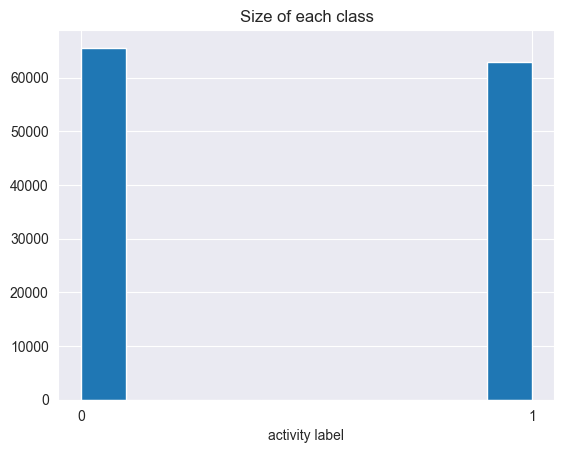

In [135]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(w_df_all.label,rwidth=1)
plt.xticks([0,1]);

In [136]:
x= (w_df_all.action_num.unique())
x.sort()
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86, 500, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544,
       545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
       558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570,
       571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
       584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 59

''

<Figure size 640x480 with 0 Axes>

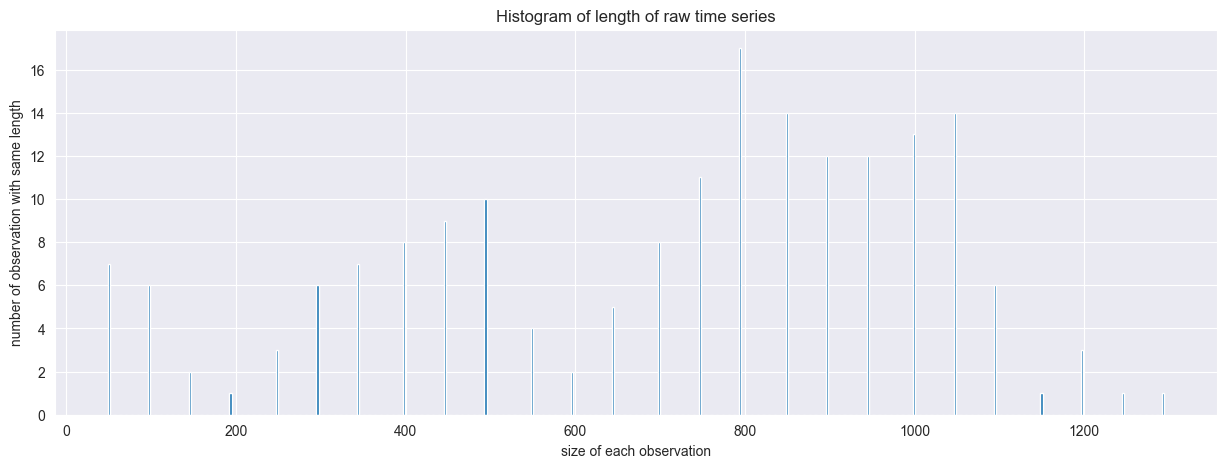

In [137]:
### Length of time series
action_num_list = w_df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(w_df_all[(w_df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.4,align='left')
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length")
#plt.axvline(300, color="grey",linestyle="dashed")
#plt.axvline(600, color="grey",linestyle="dashed")
;

In [138]:
# There is too small and too large datasets
# lets analyze which is which
action_num_list = w_df_all.action_num.unique()
each_series_length = list()
for act_num in action_num_list:
    each_series_length.append((w_df_all[(w_df_all.action_num == act_num)].shape[0],act_num))
each_series_length.sort()

### Analyze DSs

In [140]:
#check the largest dataset
dataset_name = w_df_all[w_df_all.action_num == each_series_length[-1][1]].action.unique()[0]
print(f"The largest dataset size is {each_series_length[-1][0]} records with name: {dataset_name}")

The largest dataset size is 1300 records with name: f_sit_hold_LookMobile_2sec_front


In [144]:
w_df_all.shape

(128500, 15)

### Conclusion

From above analysis

1. This dataset raised concern on class imbalance. --> make sure to consider same number of  f and t dataset 
2. The distribution of time-series length is broad. --> average dataset size should be around 200 - 300 (4sec to 6sec)

## Export Data

In [147]:
w_arr_all.shape

(2570, 50, 16)

In [82]:
w_df_all.to_pickle("merged_w_df.pkl")

(128500, 15)

In [151]:
import pickle
with open('merged_w_arr.pkl','wb') as f:
    pickle.dump(w_arr_all, f)